In [1]:
import matplotlib
import pandas as pd
import json
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from nexa_preprocessing.utils.time_series_operations import slice_by
from py_sentimotion_mapper.sentimotion_mapper import Mapper

In [3]:
Mapper._load_data_if_needed()

## Data filtration

Load full export from database and filter on completed aliases and metadata

In [4]:
df = pd.read_csv("data/full_export.csv")
df

,filename,alias,emotion_id,valence,set_number,video_id,emotion_id_reply,emotion_options,randomization_id,processed_status
0,A102_bor_p_3,0190feb305e543098d8b643e190bef34,26,neg,1,A102,1000,"['32', '34', '11', '43', '22', '31', '3', '35'...",172,0
1,A102_cont_p_2,0190feb305e543098d8b643e190bef34,32,neg,1,A102,1000,"['32', '34', '11', '43', '22', '31', '3', '35'...",172,0
2,A102_cont_v_2,0190feb305e543098d8b643e190bef34,32,neg,1,A102,1000,"['32', '34', '11', '43', '22', '31', '3', '35'...",172,0
3,A102_dou_p_3,0190feb305e543098d8b643e190bef34,3,neg,1,A102,1000,"['32', '34', '11', '43', '22', '31', '3', '35'...",172,0
4,A200_anx_v_2,0190feb305e543098d8b643e190bef34,34,neg,1,A200,1000,"['32', '34', '11', '43', '22', '31', '3', '35'...",172,0
...,...,...,...,...,...,...,...,...,...,...
164995,A91_amu_p_3,ebef64132b5848809b54b7aa1726b446,13,pos,1,A91,1000,"['16', '5', '9', '36', '42', '8', '2', '25', '...",56,0
164996,A91_det_p_2,ebef64132b5848809b54b7aa1726b446,2,pos,1,A91,1000,"['16', '5', '9', '36', '42', '8', '2', '25', '...",56,0
164997,A91_ele_p_2,ebef64132b5848809b54b7aa1726b446,8,pos,1,A91,1000,"['16', '5', '9', '36', '42', '8', '2', '25', '...",56,0
164998,A91_ple_p_3,ebef64132b5848809b54b7aa1726b446,23,pos,1,A91,1000,"['16', '5', '9', '36', '42', '8', '2', '25', '...",56,0


In [5]:
slices = slice_by(df, "alias")
len(slices)

1250

In [6]:
complete_aliases = []
incomplete_aliases = []

for s in slices:
    all_rows_equal_1000 = (s['emotion_id_reply'] == 1000).all()
    if not all_rows_equal_1000:
        has_emotion_id_1000 = (s['emotion_id_reply'] == 1000).any()
        if has_emotion_id_1000:
            incomplete_aliases.append(s)
        else:
            complete_aliases.append(s)

In [7]:
len(complete_aliases)

275

In [8]:
len(incomplete_aliases)

10

In [9]:
# Specify the path to your JSON file
meta_file_path = "data/meta.json"

# Open and read the JSON file
with open(meta_file_path, 'r') as json_file:
    # Load the JSON data into a Python dictionary
    data_dict = json.load(json_file)

In [10]:
filtered_aliases = []
for s in complete_aliases:
    if s["alias"].isin(data_dict).any():
        filtered_aliases.append(s)

In [11]:
len(filtered_aliases)

266

In [12]:
df = pd.concat(filtered_aliases, ignore_index=True)
df

,filename,alias,emotion_id,valence,set_number,video_id,emotion_id_reply,emotion_options,randomization_id,processed_status
0,A102_emb_p_2,0010541301574d33a41c542299f184a6,39,neg,0,A102,40,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1
1,A102_fea_p_2,0010541301574d33a41c542299f184a6,10,neg,0,A102,32,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1
2,A102_rej_p_3,0010541301574d33a41c542299f184a6,14,neg,0,A102,14,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1
3,A102_sad_p_3,0010541301574d33a41c542299f184a6,6,neg,0,A102,43,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1
4,A102_sha_v_2,0010541301574d33a41c542299f184a6,43,neg,0,A102,39,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1
...,...,...,...,...,...,...,...,...,...,...
35107,A72_rej_p_3,ff807190c01845fa827a02d5e23ed14c,14,neg,0,A72,1,"['34', '14', '39', '11', '12', '43', '37', '3'...",127,1
35108,A91_anx_p_3,ff807190c01845fa827a02d5e23ed14c,34,neg,0,A91,3,"['34', '14', '39', '11', '12', '43', '37', '3'...",127,1
35109,A91_conf_p_3,ff807190c01845fa827a02d5e23ed14c,1,neg,0,A91,3,"['34', '14', '39', '11', '12', '43', '37', '3'...",127,1
35110,A91_disa_v_3,ff807190c01845fa827a02d5e23ed14c,37,neg,0,A91,34,"['34', '14', '39', '11', '12', '43', '37', '3'...",127,1


## Results overview

In [13]:
y_true = df[["emotion_id"]]
y_pred = df[["emotion_id_reply"]]

In [14]:
report = classification_report(y_true, y_pred,
                               target_names=Mapper.emotion_id_to_emotion.values())

print(report)

                          precision    recall  f1-score   support

                  regret       0.22      0.22      0.22       828
               confusion       0.40      0.47      0.43       768
           determination       0.53      0.57      0.55       708
                   doubt       0.25      0.30      0.27       720
                    envy       0.22      0.13      0.16       876
              admiration       0.18      0.19      0.19       756
                 sadness       0.47      0.47      0.47       768
               gratitude       0.27      0.30      0.29       768
     elevation_rejoicing       0.14      0.09      0.11       756
       positive_surprise       0.37      0.46      0.41       756
                    fear       0.52      0.50      0.51       840
       negative_surprise       0.31      0.39      0.35       780
                   anger       0.61      0.70      0.65       756
               amusement       0.50      0.45      0.47       780
         

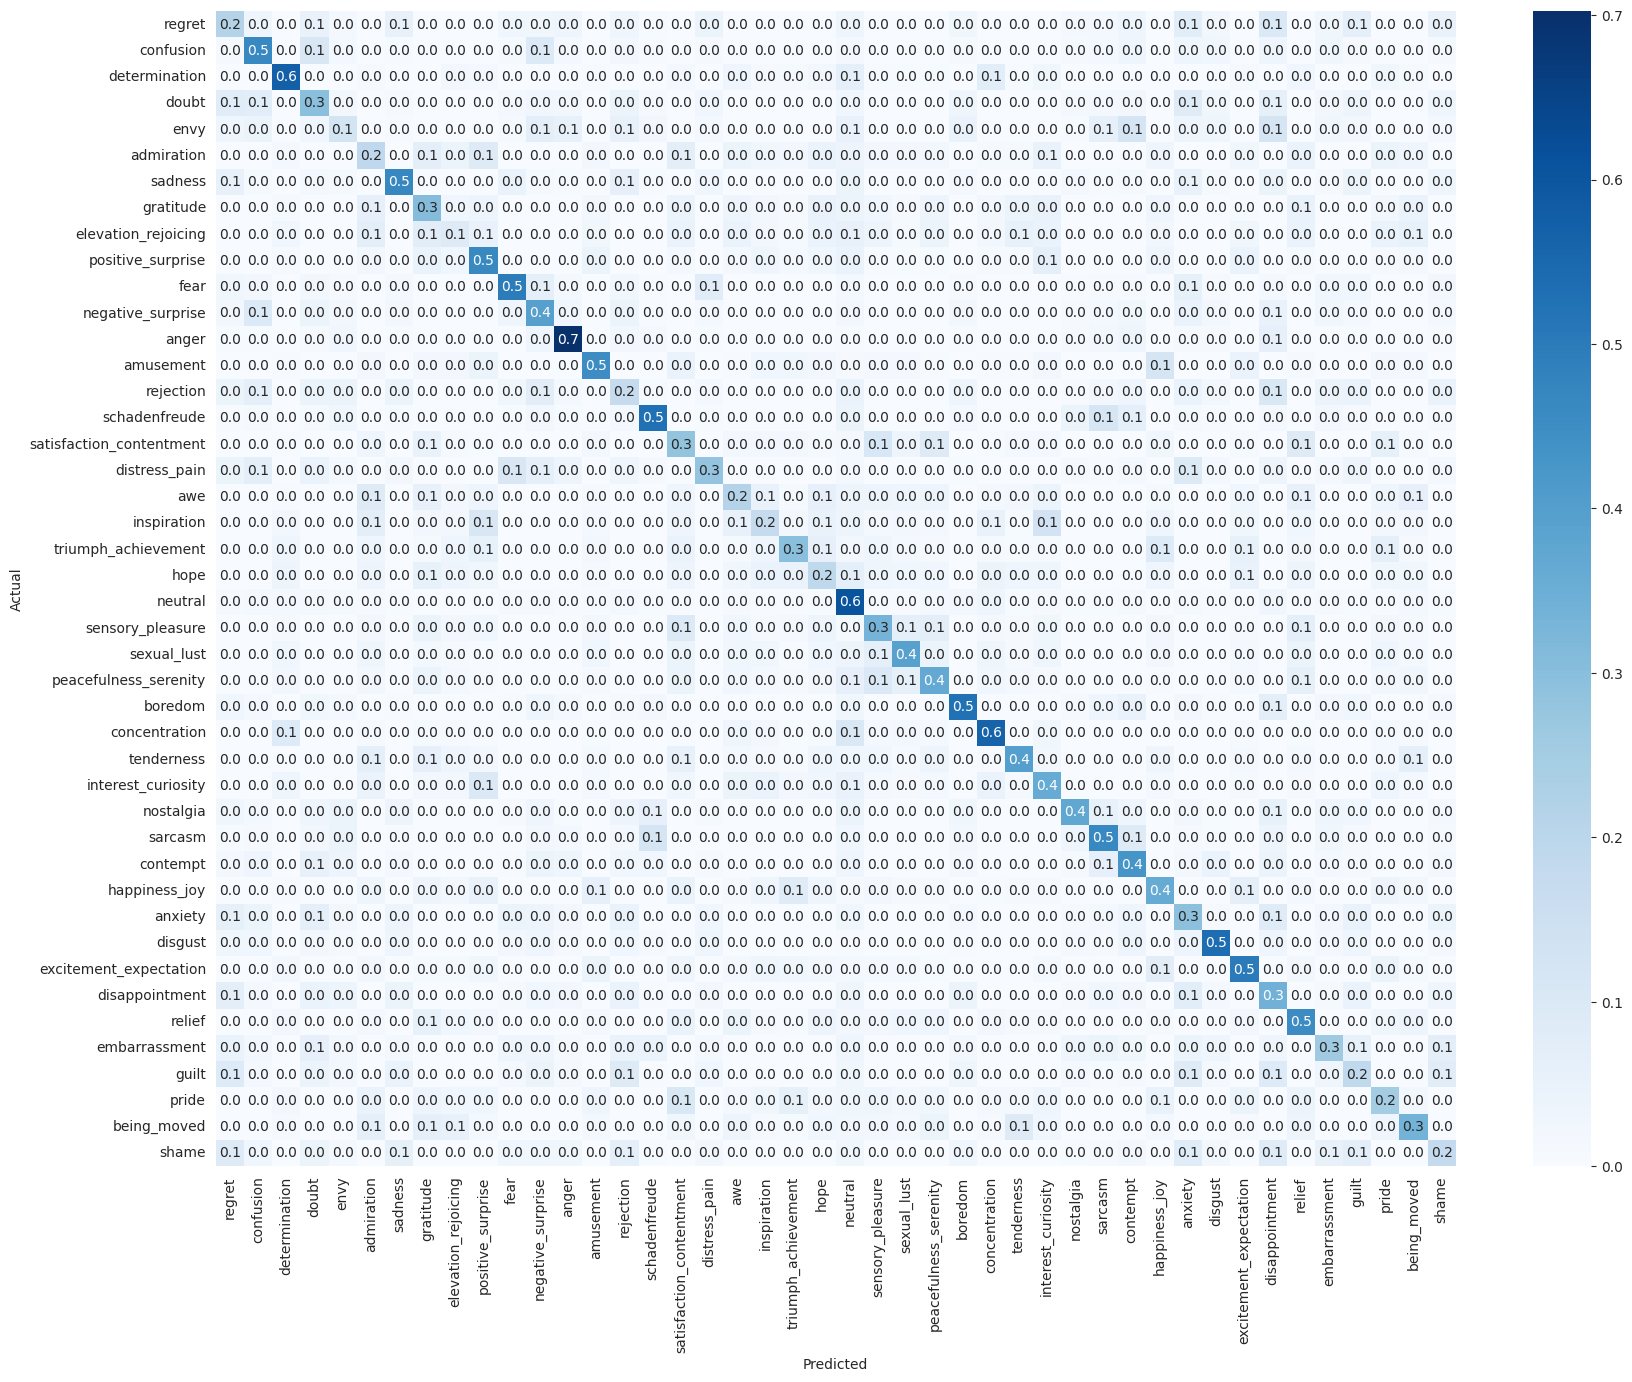

In [15]:
conf_matrix = confusion_matrix(y_true, y_pred, normalize="true")

emotion_ids = np.unique(y_true)
emotion_names = Mapper.get_emotion_from_id(emotion_ids)
df_cm = pd.DataFrame(conf_matrix, list(emotion_names), list(emotion_names))


plt.figure(figsize=(20, 15))
sns.heatmap(df_cm, cmap="Blues", annot=True, fmt=".1f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Separating negative and positive emotions

### Negative Emotions

In [16]:
negative_emotions = []
for key, val in Mapper.emotion_to_valence.items():
    if val == "neg" or val == "neu":
        negative_emotions.append(key)

In [17]:
neg_df = df[df['valence'] == 'neg']

In [18]:
y_true = neg_df[["emotion_id"]]
y_pred = neg_df[["emotion_id_reply"]]

report = classification_report(y_true, y_pred,
                               target_names=negative_emotions)

print(report)

                   precision    recall  f1-score   support

            anger       0.22      0.22      0.22       828
          anxiety       0.40      0.47      0.43       768
          boredom       0.25      0.30      0.27       720
        confusion       0.22      0.13      0.16       876
         contempt       0.47      0.47      0.47       768
   disappointment       0.52      0.50      0.51       840
          disgust       0.31      0.39      0.35       780
    distress_pain       0.61      0.70      0.65       756
            doubt       0.18      0.17      0.18       792
    embarrassment       0.57      0.53      0.55       816
             envy       0.39      0.28      0.32       756
             fear       0.43      0.54      0.48       684
            guilt       0.50      0.52      0.51       744
        nostalgia       0.57      0.38      0.45       888
           regret       0.46      0.47      0.46       828
        rejection       0.34      0.43      0.38       

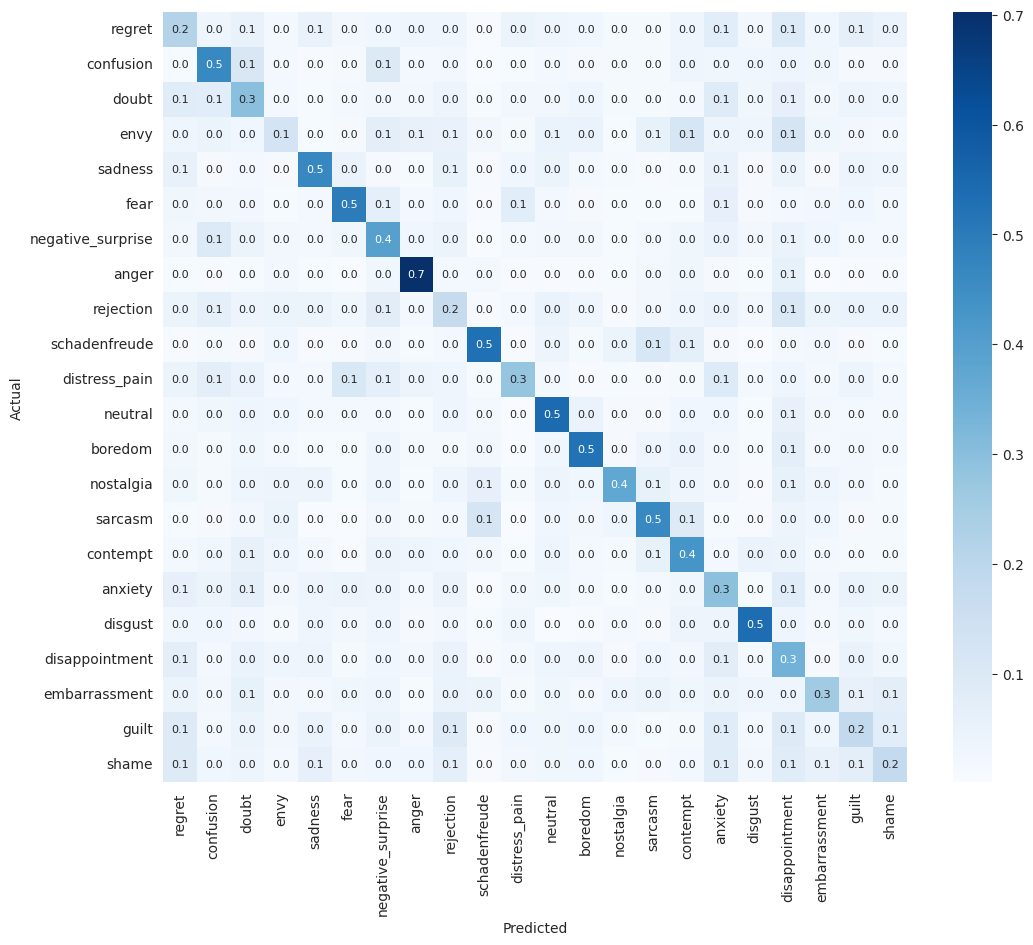

In [19]:
conf_matrix = confusion_matrix(y_true, y_pred, normalize="true")

emotion_ids = np.unique(y_true)
emotion_names = Mapper.get_emotion_from_id(emotion_ids)
df_cm = pd.DataFrame(conf_matrix, list(emotion_names), list(emotion_names))

plt.figure(figsize=(12, 10))
sns.heatmap(df_cm, cmap="Blues", annot=True, fmt=".1f", annot_kws={"size": 8})
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Positive Emotions

In [20]:
positive_emotions = []
for key, val in Mapper.emotion_to_valence.items():
    if val == "pos" or val == "neu":
        positive_emotions.append(key)

In [21]:
len(positive_emotions)

23

In [22]:
pos_df = df[df['valence'] == 'pos']
y_true = pos_df[["emotion_id"]]
y_pred = pos_df[["emotion_id_reply"]]

report = classification_report(y_true, y_pred,
                               target_names=positive_emotions)

print(report)

                          precision    recall  f1-score   support

              admiration       0.53      0.57      0.55       708
               amusement       0.18      0.19      0.19       756
                     awe       0.27      0.30      0.29       768
           concentration       0.14      0.09      0.11       756
satisfaction_contentment       0.37      0.46      0.41       756
           determination       0.50      0.45      0.47       780
     elevation_rejoicing       0.26      0.28      0.27       876
  excitement_expectation       0.27      0.22      0.24       804
               gratitude       0.24      0.17      0.20       780
           happiness_joy       0.41      0.30      0.34       816
                    hope       0.23      0.19      0.21       840
             inspiration       0.42      0.66      0.52       696
      interest_curiosity       0.34      0.33      0.34       864
             sexual_lust       0.46      0.39      0.42       804
         

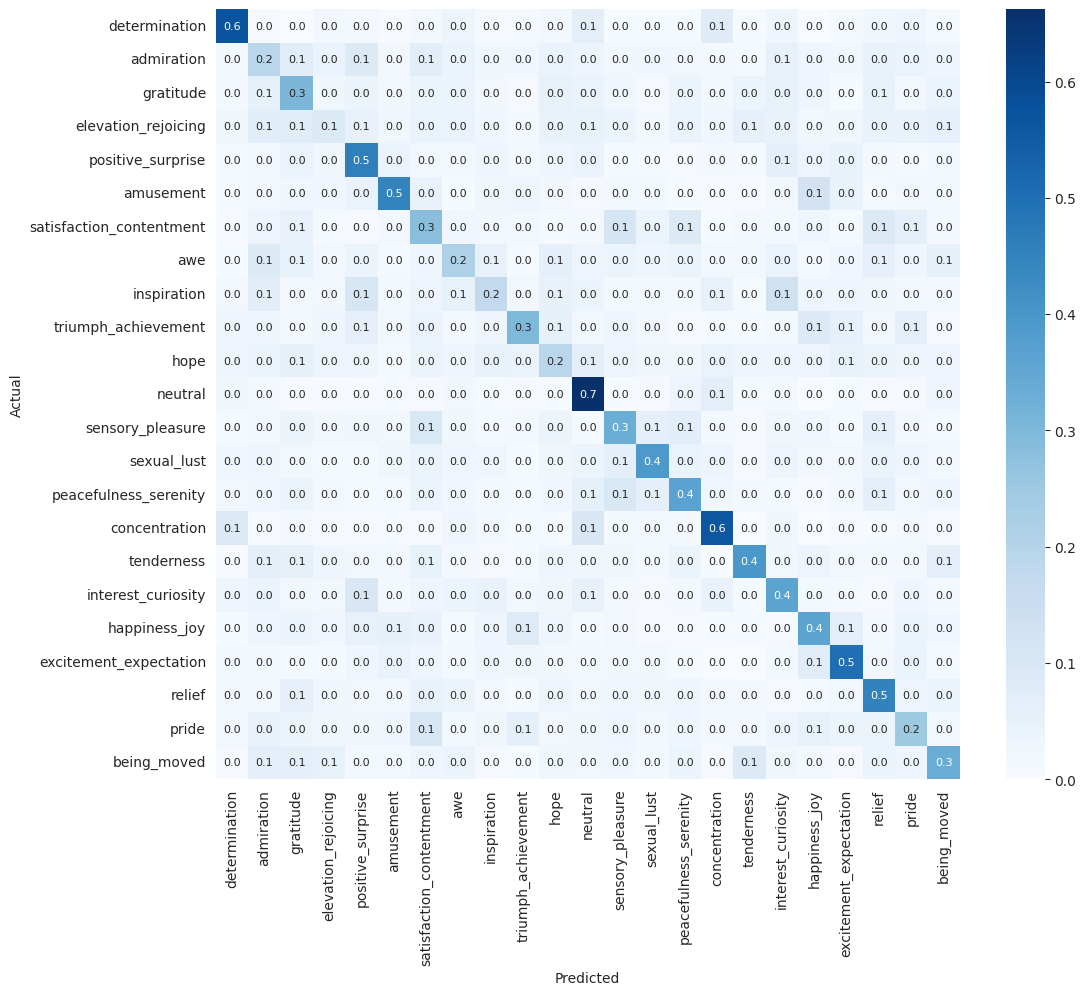

In [23]:
conf_matrix = confusion_matrix(y_true, y_pred, normalize="true")

emotion_ids = np.unique(y_true)
emotion_names = Mapper.get_emotion_from_id(emotion_ids)
df_cm = pd.DataFrame(conf_matrix, list(emotion_names), list(emotion_names))

plt.figure(figsize=(12, 10))
sns.heatmap(df_cm, cmap="Blues", annot=True, fmt=".1f", annot_kws={"size": 8})
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()